In [1]:
import pandas as pd

In [2]:
ms = pd.read_csv('../../sample_train.csv', low_memory=False)

### Variáveis eliminados por excesso de NAs

In [3]:
ms[['PuaMode','DefaultBrowsersIdentifier','Census_ProcessorClass']].isna().sum() / ms.shape[0]

PuaMode                      0.999772
DefaultBrowsersIdentifier    0.951490
Census_ProcessorClass        0.995868
dtype: float64

### Variáveis eliminadas por excesso de valores
Porque está o organization identifier? No máximo estaria em risco não?

In [4]:
ms[['CityIdentifier',
'AVProductStatesIdentifier',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorModelIdentifier',
'Census_FirmwareVersionIdentifier',
'OsBuildLab']].nunique()

CityIdentifier                      40323
AVProductStatesIdentifier            6100
Census_OEMNameIdentifier             1664
Census_OEMModelIdentifier           45094
Census_ProcessorModelIdentifier      2331
Census_FirmwareVersionIdentifier    25074
OsBuildLab                            472
dtype: int64

### Variáveis em risco de serem eliminadas por um excesso de atributos

In [5]:
ms[['CountryIdentifier','IeVerIdentifier',
    'Census_OSBuildNumber','Census_OSBuildRevision',
    'Census_OSUILocaleIdentifier','GeoNameIdentifier',
   'LocaleEnglishNameIdentifier','Census_FirmwareManufacturerIdentifier']].nunique()

CountryIdentifier                        222
IeVerIdentifier                          189
Census_OSBuildNumber                      64
Census_OSBuildRevision                   239
Census_OSUILocaleIdentifier               94
GeoNameIdentifier                        266
LocaleEnglishNameIdentifier              241
Census_FirmwareManufacturerIdentifier    314
dtype: int64

In [6]:
#eliminar
ms['IeVerIdentifier'].value_counts()
print(ms['IeVerIdentifier'].isna().sum() / ms.shape[0])

0.006641666666666666


In [7]:
## eliminar
print(ms['Census_OSBuildRevision'].value_counts())
print(ms['Census_OSBuildRevision'].isna().sum() / ms.shape[0])

228      95059
165      60370
431      36659
285      31494
547      23297
112      23158
371      22183
191      15514
2189     15024
611      14468
125      14369
17443    13887
1176     12198
0        11333
492      11245
309      10270
286       9239
15        7909
254       7455
1         7270
1266      6894
1206      6805
192       6628
167       5853
248       5153
137       5147
48        4435
1088      4232
81        3781
693       3527
         ...  
79           4
594          4
456          4
448          4
16566        4
17673        3
1002         3
16387        3
1230         3
242          3
17488        2
103          2
16389        2
491          2
19102        2
16500        1
16394        1
1005         1
1540         1
17533        1
1417         1
639          1
1797         1
16732        1
17609        1
842          1
201          1
17643        1
1613         1
41736        1
Name: Census_OSBuildRevision, Length: 239, dtype: int64
0.0


In [8]:
## manter 
print(ms['Census_OSUILocaleIdentifier'].value_counts())
print(ms['Census_OSUILocaleIdentifier'].isna().sum() / ms.shape[0])

31     213527
34      70193
30      34466
125     33673
49      29018
158     27224
35      25165
119     22656
26      17091
148     13986
160     13747
72      12934
83      11256
109      9632
115      8932
120      7254
5        5701
64       5617
74       5605
20       4892
28       3489
140      3264
58       2843
24       2400
128      2204
105      2040
130      1503
44       1384
11       1248
62       1076
        ...  
39          4
152         3
139         3
121         3
7           3
110         3
122         3
21          2
124         2
8           2
129         2
19          2
76          2
60          2
80          2
89          1
6           1
69          1
81          1
138         1
84          1
102         1
33          1
95          1
41          1
98          1
25          1
99          1
132         1
50          1
Name: Census_OSUILocaleIdentifier, Length: 94, dtype: int64
0.0


In [9]:
print(ms['OsVer'].isna().sum() / ms.shape[0])
print(ms['EngineVersion'].nunique())
print(ms['IsBeta'].nunique())

0.0
53
2


In [10]:
## manter 
print(ms['Census_OSBuildNumber'].value_counts())
print(ms['Census_OSBuildNumber'].isna().sum() / ms.shape[0])

17134    269321
16299    164254
15063     53976
14393     52678
10586     40120
10240     18180
17692       216
17738       201
17744       158
17758       132
17746        88
17754        78
17735        65
17751        64
17763        57
17741        54
17755        46
17760        40
17686        34
17733        32
17672        28
17133        18
17682        17
17677        16
18234        15
17666        13
18237        10
17661        10
18242         9
17639         9
          ...  
17730         3
17618         3
14390         2
14971         2
17627         2
9600          2
17634         2
17713         2
17761         1
17711         1
7601          1
14915         1
14421         1
14931         1
14936         1
14951         1
14946         1
10565         1
14466         1
17025         1
14474         1
14986         1
17074         1
15055         1
15048         1
16193         1
17115         1
14295         1
17655         1
14332         1
Name: Census_OSBuildNumb

### Variáveis eliminadas por parecerem parecidas a outras variáveis

- Census_ChassisTypeName
    - Para além das semelhanças existem também valores numéricos que não percebemos


In [11]:
ms['Census_ChassisTypeName'].value_counts()

Notebook               352649
Desktop                125724
Laptop                  46314
Portable                24345
AllinOne                13689
MiniTower                5858
Convertible              5714
Other                    5143
UNKNOWN                  4642
Detachable               3448
LowProfileDesktop        3385
HandHeld                 2956
SpaceSaving              2018
Tablet                    896
Tower                     826
Unknown                   687
MainServerChassis         658
MiniPC                    319
LunchBox                  267
RackMountChassis          262
BusExpansionChassis        49
SubNotebook                43
30                         19
0                          10
StickPC                     9
Blade                       5
SealedCasePC                4
PizzaBox                    4
35                          3
MultisystemChassis          3
31                          2
ExpansionChassis            1
32                          1
28        

In [12]:
numericos = ['AVProductsInstalled',
'AVProductsEnabled',
'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity',
'Census_SystemVolumeTotalCapacity',
'Census_TotalPhysicalRAM',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_InternalBatteryNumberOfCharges']

In [13]:
eliminar = ['MachineIdentifier',
 'PuaMode',
 'DefaultBrowsersIdentifier',
 'Census_ProcessorClass',
 'CountryIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'AVProductStatesIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'IeVerIdentifier',
 'Census_OSBuildRevision',
 'OsBuildLab',
 'Census_ChassisTypeName',
 'Census_IsFlightingInternal',
 'Census_IsWIMBootEnabled']

In [14]:
ms[eliminar].nunique()

MachineIdentifier                        600000
PuaMode                                       1
DefaultBrowsersIdentifier                   610
Census_ProcessorClass                         3
CountryIdentifier                           222
CityIdentifier                            40323
GeoNameIdentifier                           266
LocaleEnglishNameIdentifier                 241
AVProductStatesIdentifier                  6100
Census_OEMNameIdentifier                   1664
Census_OEMModelIdentifier                 45094
Census_ProcessorModelIdentifier            2331
Census_FirmwareVersionIdentifier          25074
Census_FirmwareManufacturerIdentifier       314
IeVerIdentifier                             189
Census_OSBuildRevision                      239
OsBuildLab                                  472
Census_ChassisTypeName                       35
Census_IsFlightingInternal                    1
Census_IsWIMBootEnabled                       1
dtype: int64

In [15]:
ms[eliminar].isna().sum() / ms.shape[0] * 100

MachineIdentifier                         0.000000
PuaMode                                  99.977167
DefaultBrowsersIdentifier                95.149000
Census_ProcessorClass                    99.586833
CountryIdentifier                         0.000000
CityIdentifier                            3.611333
GeoNameIdentifier                         0.002500
LocaleEnglishNameIdentifier               0.000000
AVProductStatesIdentifier                 0.400500
Census_OEMNameIdentifier                  1.067667
Census_OEMModelIdentifier                 1.147833
Census_ProcessorModelIdentifier           0.482167
Census_FirmwareVersionIdentifier          1.835333
Census_FirmwareManufacturerIdentifier     2.109833
IeVerIdentifier                           0.664167
Census_OSBuildRevision                    0.000000
OsBuildLab                                0.000333
Census_ChassisTypeName                    0.007500
Census_IsFlightingInternal               83.058333
Census_IsWIMBootEnabled        

In [16]:
ms = ms.drop(columns = eliminar, errors='ignore')

In [17]:
ms[numericos].describe()

,AVProductsInstalled,AVProductsEnabled,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges
count,597597.000000,597597.000000,597107.000000,5.962750e+05,5.962760e+05,594387.000000,596741.000000,596747.000000,596747.000000,5.817450e+05
mean,1.326059,1.020740,3.992517,5.134265e+05,3.778890e+05,6122.585413,16.680267,1548.203957,897.898362,1.124047e+09
std,0.522140,0.167313,2.080830,3.731920e+05,3.247680e+05,5215.878857,5.904098,369.372451,215.199986,1.887927e+09
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,512.000000,4.900000,-1.000000,-1.000000,0.000000e+00
25%,1.000000,1.000000,2.000000,2.393720e+05,1.208040e+05,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00
50%,1.000000,1.000000,4.000000,4.769400e+05,2.498990e+05,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00
75%,2.000000,1.000000,4.000000,9.538690e+05,4.759780e+05,8192.000000,17.200000,1920.000000,1080.000000,4.294967e+09
max,6.000000,4.000000,88.000000,6.867302e+07,1.144361e+07,917504.000000,142.000000,11520.000000,4320.000000,4.294967e+09


In [18]:
ms[numericos].nunique()

AVProductsInstalled                                       7
AVProductsEnabled                                         5
Census_ProcessorCoreCount                                28
Census_PrimaryDiskTotalCapacity                        1193
Census_SystemVolumeTotalCapacity                     158820
Census_TotalPhysicalRAM                                 626
Census_InternalPrimaryDiagonalDisplaySizeInInches       508
Census_InternalPrimaryDisplayResolutionHorizontal       539
Census_InternalPrimaryDisplayResolutionVertical         568
Census_InternalBatteryNumberOfCharges                  5947
dtype: int64

In [19]:
for tipo in ms.columns:
    if tipo not in numericos:
            print(ms[tipo].describe())

count           600000
unique               4
top       win8defender
freq            593588
Name: ProductName, dtype: object
count          600000
unique             53
top       1.1.15200.1
freq           258455
Name: EngineVersion, dtype: object
count              600000
unique                 97
top       4.18.1807.18075
freq               345464
Name: AppVersion, dtype: object
count           600000
unique            6713
top       1.273.1420.0
freq              6926
Name: AvSigVersion, dtype: object
count    600000.000000
mean          0.000010
std           0.003162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: IsBeta, dtype: float64
count    597831.000000
mean          6.847266
std           1.019600
min           0.000000
25%           7.000000
50%           7.000000
75%           7.000000
max          35.000000
Name: RtpStateBitfield, dtype: float64
count    600000.000000
mean          0.017110
std     

In [20]:
categoricos = [i for i in ms.columns if i not in numericos]

In [21]:
ms[categoricos].isna().sum()[ms[categoricos].isna().sum() != 0] / ms.shape[0] * 100

RtpStateBitfield                            0.361500
OrganizationIdentifier                     30.845500
IsProtected                                 0.397500
SMode                                       6.015500
SmartScreen                                35.611333
Firewall                                    1.031167
UacLuaenable                                0.117500
Census_ProcessorManufacturerIdentifier      0.482167
Census_PrimaryDiskTypeName                  0.148333
Census_PowerPlatformRoleName                0.000833
Census_InternalBatteryType                 71.052833
Census_OSInstallLanguageIdentifier          0.705000
Census_IsFlightsDisabled                    1.829833
Census_ThresholdOptIn                      63.539500
Census_IsVirtualDevice                      0.186000
Census_IsAlwaysOnAlwaysConnectedCapable     0.822167
Wdft_IsGamer                                3.415333
Wdft_RegionIdentifier                       3.415333
dtype: float64

In [22]:
for var in ms.columns:
    if len(ms[var].value_counts()) < 2:
        print(var)

In [23]:
ms[categoricos].nunique()[ms[categoricos].nunique() > 40]

EngineVersion                    53
AppVersion                       97
AvSigVersion                   6713
OrganizationIdentifier           44
OsBuild                          49
Census_OSVersion                305
Census_OSBuildNumber             64
Census_OSUILocaleIdentifier      94
dtype: int64

#### Agrupar classes que têm valores do tipo X.Y.Z.W para X.Y

In [24]:
def trataString(string):
    words = string.split(".")
    palavra= '' + words[0] + '.' + words[1]
    return palavra
ms['AppVersion'] = ms['AppVersion'].apply(lambda x : trataString(x))
print(len(ms['AppVersion'].unique()))
ms['AvSigVersion'] = ms['AvSigVersion'].apply(lambda x : trataString(x))
len(ms['AvSigVersion'].unique())

15


38

#### Agrupar classes que têm valores do tipo X.Y.Z.W para X.Y.Z

In [25]:
def trataString2(string):
    words = string.split(".")
    palavra= '' + words[0] + '.' + words[1] + '.' + words[2]
    return palavra
ms['Census_OSVersion'] = ms['Census_OSVersion'].apply(lambda x : trataString2(x))
print(len(ms['Census_OSVersion'].unique()))

64


## Tratamento de algumas variaveis

- SmartScreen
- UacLuaenable


In [26]:
ms['SmartScreen'] = ms['SmartScreen'].replace({"on": "On", "off": "Off", "OFF": "Off"})
ms.loc[ms['UacLuaenable'] > 1, 'UacLuaenable'] = 1

In [27]:
ms['SmartScreen'] = ms['SmartScreen'].replace({"&#x02;": "other", "&#x01;": "other", "0": "other"})
ms['SmartScreen'].value_counts()

RequireAdmin    290138
ExistsNotSet     70339
Off              12736
Warn              9080
Prompt            2425
Block             1493
On                  73
other               48
Name: SmartScreen, dtype: int64

In [28]:
ms['Census_InternalBatteryType'].value_counts()

#ms['Census_InternalBatteryType'] = ms['Census_InternalBatteryType'].replace({"li-i": "lion", "&#x01;": "other", "0": "other"})



lion    136134
li-i     16536
#        12488
lip       4182
liio      2264
li p       571
li         450
nimh       304
real       184
bq20       163
pbac       162
vbox        91
unkn        43
lgi0        31
4cel        22
lipo        16
lhp0        11
ithi         6
lipp         5
batt         4
pad0         3
virt         2
ram          2
lit          2
bad          2
p-sn         1
a132         1
lio          1
ca48         1
4lio         1
Name: Census_InternalBatteryType, dtype: int64

### Conversão dos valores para categóricos

In [29]:
for tipo in ms.columns:
    if tipo not in numericos:
            ms[tipo] = ms[tipo].astype('category')    

In [30]:
ms.describe()

,AVProductsInstalled,AVProductsEnabled,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges
count,597597.000000,597597.000000,597107.000000,5.962750e+05,5.962760e+05,594387.000000,596741.000000,596747.000000,596747.000000,5.817450e+05
mean,1.326059,1.020740,3.992517,5.134265e+05,3.778890e+05,6122.585413,16.680267,1548.203957,897.898362,1.124047e+09
std,0.522140,0.167313,2.080830,3.731920e+05,3.247680e+05,5215.878857,5.904098,369.372451,215.199986,1.887927e+09
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,512.000000,4.900000,-1.000000,-1.000000,0.000000e+00
25%,1.000000,1.000000,2.000000,2.393720e+05,1.208040e+05,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00
50%,1.000000,1.000000,4.000000,4.769400e+05,2.498990e+05,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00
75%,2.000000,1.000000,4.000000,9.538690e+05,4.759780e+05,8192.000000,17.200000,1920.000000,1080.000000,4.294967e+09
max,6.000000,4.000000,88.000000,6.867302e+07,1.144361e+07,917504.000000,142.000000,11520.000000,4320.000000,4.294967e+09


In [31]:
ms[categoricos].nunique()[ms[categoricos].nunique() > 40]

EngineVersion                  53
OrganizationIdentifier         44
OsBuild                        49
Census_OSVersion               64
Census_OSBuildNumber           64
Census_OSUILocaleIdentifier    94
dtype: int64

In [32]:
ms[categoricos].nunique().sum()

747

In [33]:
verTratar = []
for j in [i for i in categoricos]:
    if ms[j].isna().sum() > 0:
        a = (ms[j].value_counts() / ms[j].value_counts().sum() * 100)
        if a.iloc[0] < 99:
            verTratar.append(j)

In [34]:
verTratar

['RtpStateBitfield',
 'OrganizationIdentifier',
 'IsProtected',
 'SmartScreen',
 'Firewall',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSInstallLanguageIdentifier',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

### Tratar NAs dos restantes valores

Ter atenção que existe no mínimo uma coluna que não pode ser tratada com o valor modal

* Census_IsAlwaysOnAlwaysConnectedCapable - 6%
* Wdft_IsGame - 28%

* ainda existem mais, estão no array verTratar

##### Depois ver se existe este problema em algum dos vossos

In [35]:
tratar = [i for i in categoricos if i not in verTratar]
moda = ms[tratar].mode()
for coluna in tratar:
    if(ms[coluna].isna().sum() > 0):
        ms[coluna].fillna(moda[coluna][0],inplace=True)
print(ms[categoricos].isna().sum().sum())
print(ms[tratar].isna().sum().sum())
print(ms[verTratar].isna().sum().sum())

889734
0
889734


## Separação do dataset em treino teste

Vamos separar porque o restante tratamento dos NA's e a normalização vão ser baseados em métodos paramétricos pelo que é necessário esta separação. Os parametros serão estimados com os dados de teste e posteriormente aplicados aos dados de teste

In [36]:
treinoT = 550000
testeT = 600000
treino = ms[:treinoT]
teste = ms[treinoT:testeT]

In [37]:
print(teste.shape)
print(treino.shape)

(50000, 63)
(550000, 63)


### Tratar variáveis 

### Falta tratar aqueles casos de NAs que estão descritos acima
Provavelmente será realizado com um modelo (knn ou regressão logística não?)


### Falta verificar se as colunas que estão em risco sempre se excluem ou não

## Valores numéricos
Tratamos agora os valores numéricos

### Análise outliars

In [38]:
print((treino[numericos[0]]).plot.box())


AxesSubplot(0.125,0.11;0.775x0.77)


AxesSubplot(0.125,0.125;0.775x0.755)


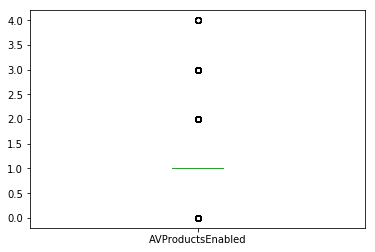

In [39]:
print((treino[numericos[1]]).plot.box())


AxesSubplot(0.125,0.125;0.775x0.755)


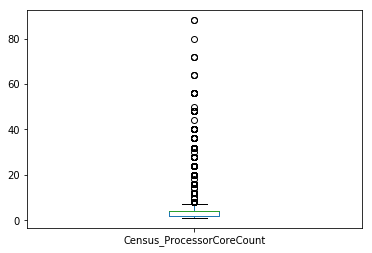

In [40]:
print((treino[numericos[2]]).plot.box())


AxesSubplot(0.125,0.125;0.775x0.755)


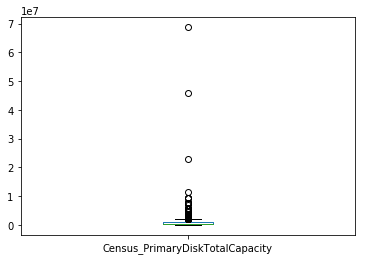

In [41]:
print((treino[numericos[3]]).plot.box())


AxesSubplot(0.125,0.125;0.775x0.755)


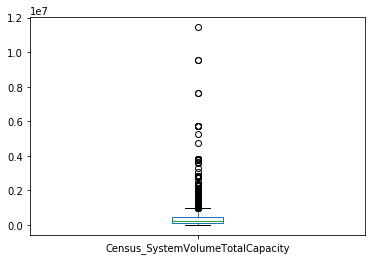

In [42]:
print((treino[numericos[4]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


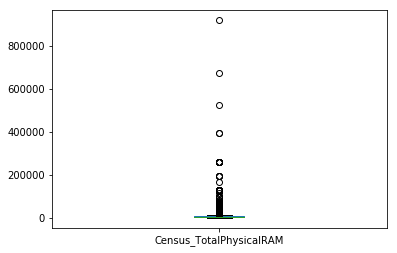

In [43]:
print((treino[numericos[5]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


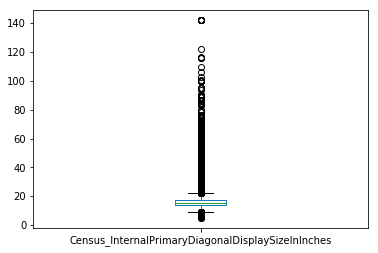

In [44]:
print((treino[numericos[6]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


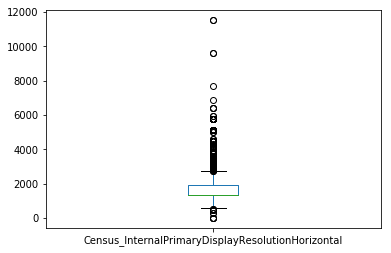

In [45]:
print((treino[numericos[7]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


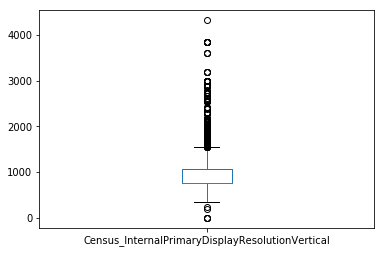

In [46]:
print((treino[numericos[8]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


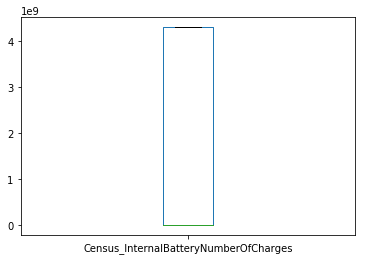

In [47]:
print((treino[numericos[9]]).plot.box())

### Tratar NAs das variáveis numéricas/continuas

Se a variavel tem outliers substituir por mediana. Caso contrário substituir pela média.

In [48]:
subNum = treino[numericos].median()
subNum['Census_InternalBatteryNumberOfCharges'] = treino['Census_InternalBatteryNumberOfCharges'].mean()
subNum['AVProductsInstalled'] = treino['AVProductsInstalled'].mean()
subNum['AVProductsEnabled'] = treino['AVProductsEnabled'].mean()
q1 = treino[numericos].quantile(0.25)
q3 = treino[numericos].quantile(0.75) 
divisao = q3 - q1
divisao['Census_InternalBatteryNumberOfCharges'] = treino['Census_InternalBatteryNumberOfCharges'].std()
divisao['AVProductsInstalled'] = treino['AVProductsInstalled'].std()
divisao['AVProductsEnabled'] = treino['AVProductsEnabled'].std()
for coluna in numericos:
    if(ms[coluna].isna().sum() > 0):
        ms[coluna].fillna(subNum[coluna],inplace=True)
ms[numericos].isna().sum().sum()

0

In [49]:
ms.isna().sum().sum()

889734

## Standardização dos dados numéricos

In [50]:
divisao

AVProductsInstalled                                  5.219001e-01
AVProductsEnabled                                    1.669732e-01
Census_ProcessorCoreCount                            2.000000e+00
Census_PrimaryDiskTotalCapacity                      7.144970e+05
Census_SystemVolumeTotalCapacity                     3.551630e+05
Census_TotalPhysicalRAM                              4.096000e+03
Census_InternalPrimaryDiagonalDisplaySizeInInches    3.300000e+00
Census_InternalPrimaryDisplayResolutionHorizontal    5.540000e+02
Census_InternalPrimaryDisplayResolutionVertical      3.120000e+02
Census_InternalBatteryNumberOfCharges                1.888571e+09
dtype: float64

In [51]:
treinoStd = ( treino[numericos] - subNum ) / divisao
treinoStd.describe()

,AVProductsInstalled,AVProductsEnabled,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges
count,5.500000e+05,5.500000e+05,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,5.500000e+05
mean,7.996836e-18,-3.569379e-16,-0.003455,0.050665,0.358966,0.490818,0.356297,0.327395,0.414398,-7.000784e-17
std,9.979953e-01,9.979953e-01,1.038988,0.522501,0.911342,1.273850,1.785637,0.665927,0.689072,9.846947e-01
min,-2.540318e+00,-6.113137e+00,-1.500000,-0.667519,-0.702917,-0.875000,-3.212121,-2.467509,-2.464744,-5.958131e-01
25%,-6.242425e-01,-1.241535e-01,-1.000000,-0.329289,-0.362715,0.000000,-0.484848,0.000000,0.000000,-5.958131e-01
50%,-6.242425e-01,-1.241535e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.958131e-01
75%,1.291833e+00,-1.241535e-01,0.000000,0.667503,0.637220,1.000000,0.515152,1.000000,1.000000,1.678376e+00
max,8.956135e+00,1.784280e+01,42.000000,95.446285,31.517393,223.000000,38.333333,18.328520,11.384615,1.678376e+00


### Realizar one-hot encoding

In [52]:
import gc
def oneHotEncoding(serie):
    colunas = serie.unique()
    dic = {}
    for coluna in colunas:
        dic[serie.name + '_' + str(coluna)] = []
    for i in serie:
        dic[serie.name + '_' + str(i)].append(1)
        for j in colunas:
            if j != i:
                dic[serie.name + '_' + str(j)].append(0)
    r = pd.DataFrame(dic)
    del dic
    gc.collect()
    return r

In [53]:
encode = [i for i in tratar if len(ms[i].unique()) > 2 and len(ms[i].unique()) <= 20]
print(encode)
ms[encode].nunique().sum()
# for var in categoricos:
#     if len(ms[var].unique()) < 3:
#         aux = oneHotEncoding(ms[var])
#         aux.to_csv('./encoding/' + var +'-1hot.csv', sep='\t', encoding='utf-8')

['ProductName', 'AppVersion', 'Platform', 'Processor', 'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']


120